# FoodHub Data Analysis

## Context

This project was developed as part of my learning journey in data analysis and Python programming. It represents my first end-to-end analytical project, where I explored real-world data to better understand how online food delivery services operate.

The dataset simulates operations from FoodHub, a food aggregator platform that connects customers with multiple restaurants through a single mobile application. The app allows users to place orders, restaurants to confirm them, and delivery partners to manage pickups and deliveries efficiently. Customers can also rate their experience after receiving their food, and FoodHub earns revenue by charging partner restaurants a fixed commission per order.

## Objective

Through this project, I aimed to analyze the platform’s order data to gain insights about customer and restaurant behavior. This experience helped me strengthen my skills in data cleaning, visualization, and interpretation using Python and Jupyter Notebook.

## About the dataset 

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('data/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Dataframe information

In [3]:
# Learn more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


There are 3 types of data types:
   * **int64** : order_id, customer_id, food_preparation_time, delivery_time
   * **float64**: cost_of_the_order
   * **object**: restaurant_name, cuisine_type, day_of_the_week, rating

However **rating** column appears to be a string when it should an integer value. Further analysis for this column must be done.

In [4]:
# Show the values of the rating column
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [5]:
# Search for null values in the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:
# Search for duplicate values
df.duplicated().sum()

0

In [7]:
## Only visualize relevant columns
df.iloc[:, 2:].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


### Observations:
* CSV file contains 1898 rows and 9 columns.
* There are not missing values for the data, as well no duplicate values. However the column of **rating** has multiples rows that have the value **Not given**. So in case that there was a need to perform operations. This values would need to be review to determine which is the better option to perform an analysis.
  

## Exploratory Data Analysis (EDA)

In [8]:
def plot_top_values(x_axis, y_axis, dataset,title, x_title_axis, y_title_axis, lines):

    """
    Creates a barplot to show the top values of a column in a dataset. It can also show the mean and median
    of the values.

    Args:
        x_axis (string): Column of the dataset that corresponds to the x_axis
        y_axis (string): Column of the dataset that corresponds to the y_axis
        dataset (dataframe): dataset that contains the corresponding values
        x_title_axis (string): Title of the x_axis plot
        y_title_axis (string): Title of the y_axis plot
        lines (int): Number of lines to be plotted alongside the barplot
            Possible values are:
            * 0: No line will be plotted
            * 1: Only the mean will be plotted
            * 2: Both the mean and the mode will be plotted
    """

    plt.figure(figsize=(20, 8))
    ax = sns.barplot(
        x=x_axis, 
        y=y_axis, 
        data=dataset,
        order=dataset[x_axis],
        palette='pastel',
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )
    
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=11)

    # Show values from the plot
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=11, fontweight='bold', padding=3)

    if lines==2:
        med_orders = dataset[y_axis].median()
        plt.axhline(y=med_orders, color='green', linestyle='--', alpha=0.7, linewidth=2)
        plt.text(len(dataset)-1, med_orders*1.05, f'Median: {int(med_orders):,}', 
                 color='green', fontweight='bold', ha='right')
        
    
    avg_orders = dataset[y_axis].mean()
    plt.axhline(y=avg_orders, color='red', linestyle='--', alpha=0.7, linewidth=2)
    plt.text(len(dataset)-1, avg_orders*1.05, f'Average: {int(avg_orders):,}', 
             color='red', fontweight='bold', ha='right')
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(x_title_axis, fontsize=14, fontweight='bold', labelpad=10)
    plt.ylabel(y_title_axis, fontsize=14, fontweight='bold', labelpad=10)
    
    plt.tight_layout()
    plt.show()

In [9]:
def plot_double_chart(dataset,col1, col2 ,title, x_title, y_title):

    """
    Creates a side by side barplot to compare the values of a column vs another another from the dataset. 

    Args:
        dataset (string): dataset that contains the corresponding values
        col1 (string): Column of the dataset that corresponds to the first value
        col2 (dataframe): Column of the dataset that corresponds to the second value
        x_title (string): Title of the x_axis plot
        y_title (string): Title of the y_axis plot
    """

    x = np.arange(len(dataset["restaurant_name"]))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(20, 8))
    
    # Bars side by side
    bars1 = ax.bar(x - width/2, dataset[col1], width, label="Weekday", color="skyblue")
    bars2 = ax.bar(x + width/2, dataset[col2], width, label="Weekend", color="salmon")

    # Show values in the plot
    for bars in [bars1, bars2]:
        ax.bar_label(bars, fmt="%.0f", padding=3,  fontsize=11, fontweight='bold')
        
        ax.set_title(title, fontsize=18, fontweight='bold', pad=20)
        ax.set_xlabel(x_title, fontsize=18, fontweight='bold', labelpad=20)
        ax.set_ylabel(y_title, fontsize=18, fontweight='bold', labelpad=20)
        ax.set_xticks(x)
        ax.set_xticklabels(dataset["restaurant_name"], rotation=45, ha="right", fontsize=12, fontweight='bold')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

### Restaurants

In [10]:
# Obtain the number of orders each restaurant has
restaurant_orders = df.groupby("restaurant_name").count().sort_values(by="order_id", ascending=False)
restaurant_orders = restaurant_orders.iloc[:,:1].reset_index()
restaurant_orders = restaurant_orders.rename(columns={'order_id': 'orders'})
restaurant_orders.head()

,restaurant_name,orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [11]:
print(f"There are {restaurant_orders.shape[0]} restaurants in the dataset.\n")

There are 178 restaurants in the dataset.



In [12]:
total_orders = restaurant_orders["orders"].sum()
print(f"There were a total of {total_orders} orders that were done.\n")

There were a total of 1898 orders that were done.



In [13]:
restaurant_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,178.0,10.662921,24.047008,1.0,1.0,3.0,8.75,219.0


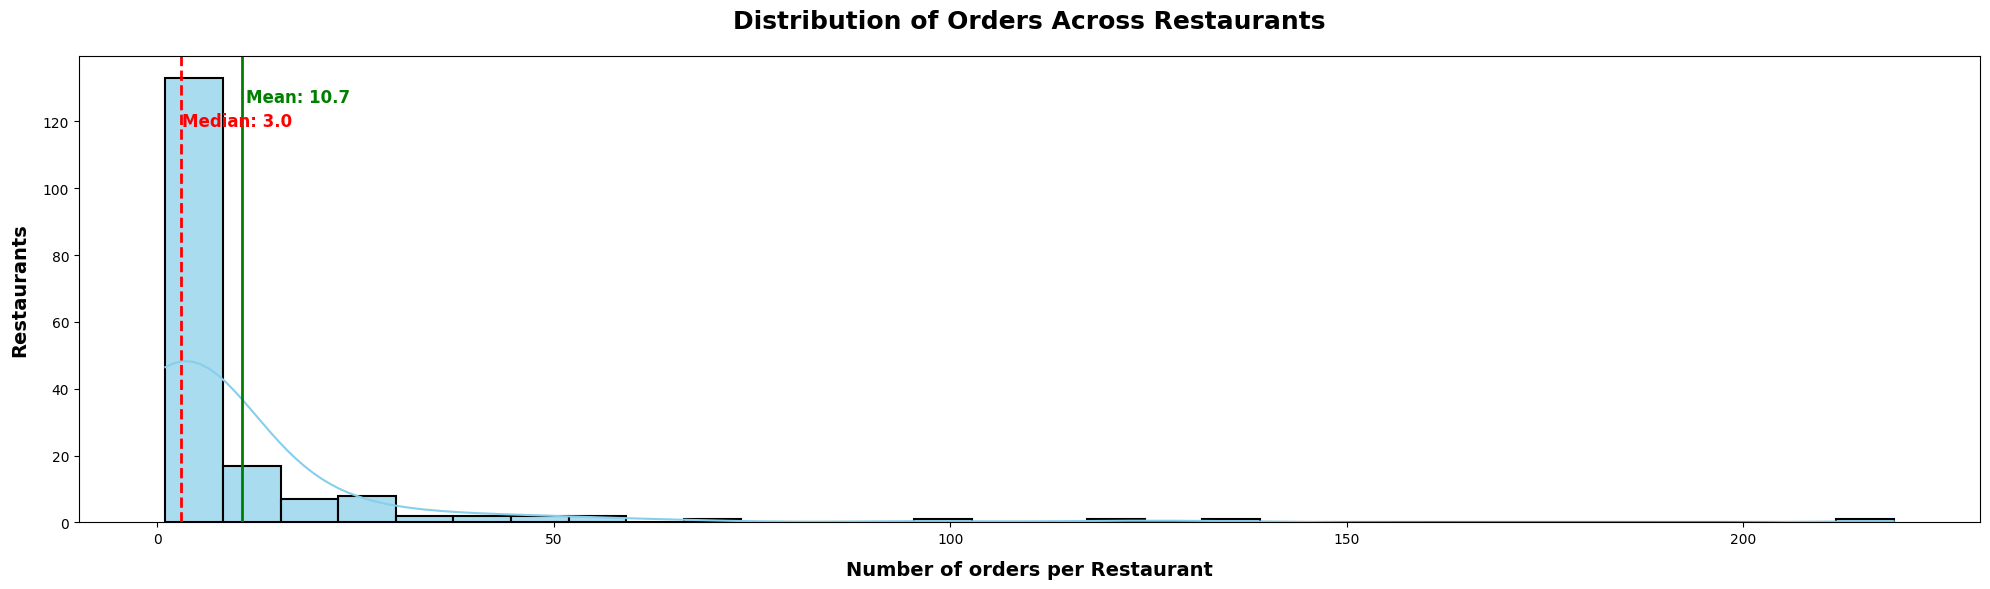

In [14]:
# Plot the distributions of orders across restaurants
plt.figure(figsize=(20, 6))

ax = sns.histplot(
    data=restaurant_orders, 
    x="orders",
    bins=30,  
    kde=True,
    color='skyblue',
    edgecolor="black",
    linewidth=1.5,
    alpha=0.7
)

median_val = restaurant_orders["orders"].median()
mean_val = restaurant_orders["orders"].mean()
plt.axvline(x=median_val, color="red", linestyle="--", linewidth=2, label=f"Median: {median_val:.1f}")
plt.axvline(x=mean_val, color="green", linestyle="-", linewidth=2, label=f"Mean: {mean_val:.1f}")

plt.text(mean_val*1.05, ax.get_ylim()[1]*0.9, f"Mean: {mean_val:.1f}", 
         fontsize=12, color="green", fontweight="bold")
plt.text(median_val*1.05, ax.get_ylim()[1]*0.85, f"Median: {median_val:.1f}", 
         fontsize=12, color="red", fontweight="bold")

plt.title("Distribution of Orders Across Restaurants", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Number of orders per Restaurant", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Restaurants", fontsize=14, fontweight="bold", labelpad=10)

plt.tight_layout()

plt.show()

In [15]:
# Add new column
restaurant_orders["percetange_of_orders"] = round((restaurant_orders["orders"]/total_orders)*100,2)
restaurant_orders.head()

,restaurant_name,orders,percetange_of_orders
0,Shake Shack,219,11.54
1,The Meatball Shop,132,6.95
2,Blue Ribbon Sushi,119,6.27
3,Blue Ribbon Fried Chicken,96,5.06
4,Parm,68,3.58


In [16]:
top_restaurants = restaurant_orders.head(10)
top_restaurants.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,10.0,88.700,55.445769,44.00,50.50,63.500,113.2500,219.00
percetange_of_orders,10.0,4.673,2.921472,2.32,2.66,3.345,5.9675,11.54


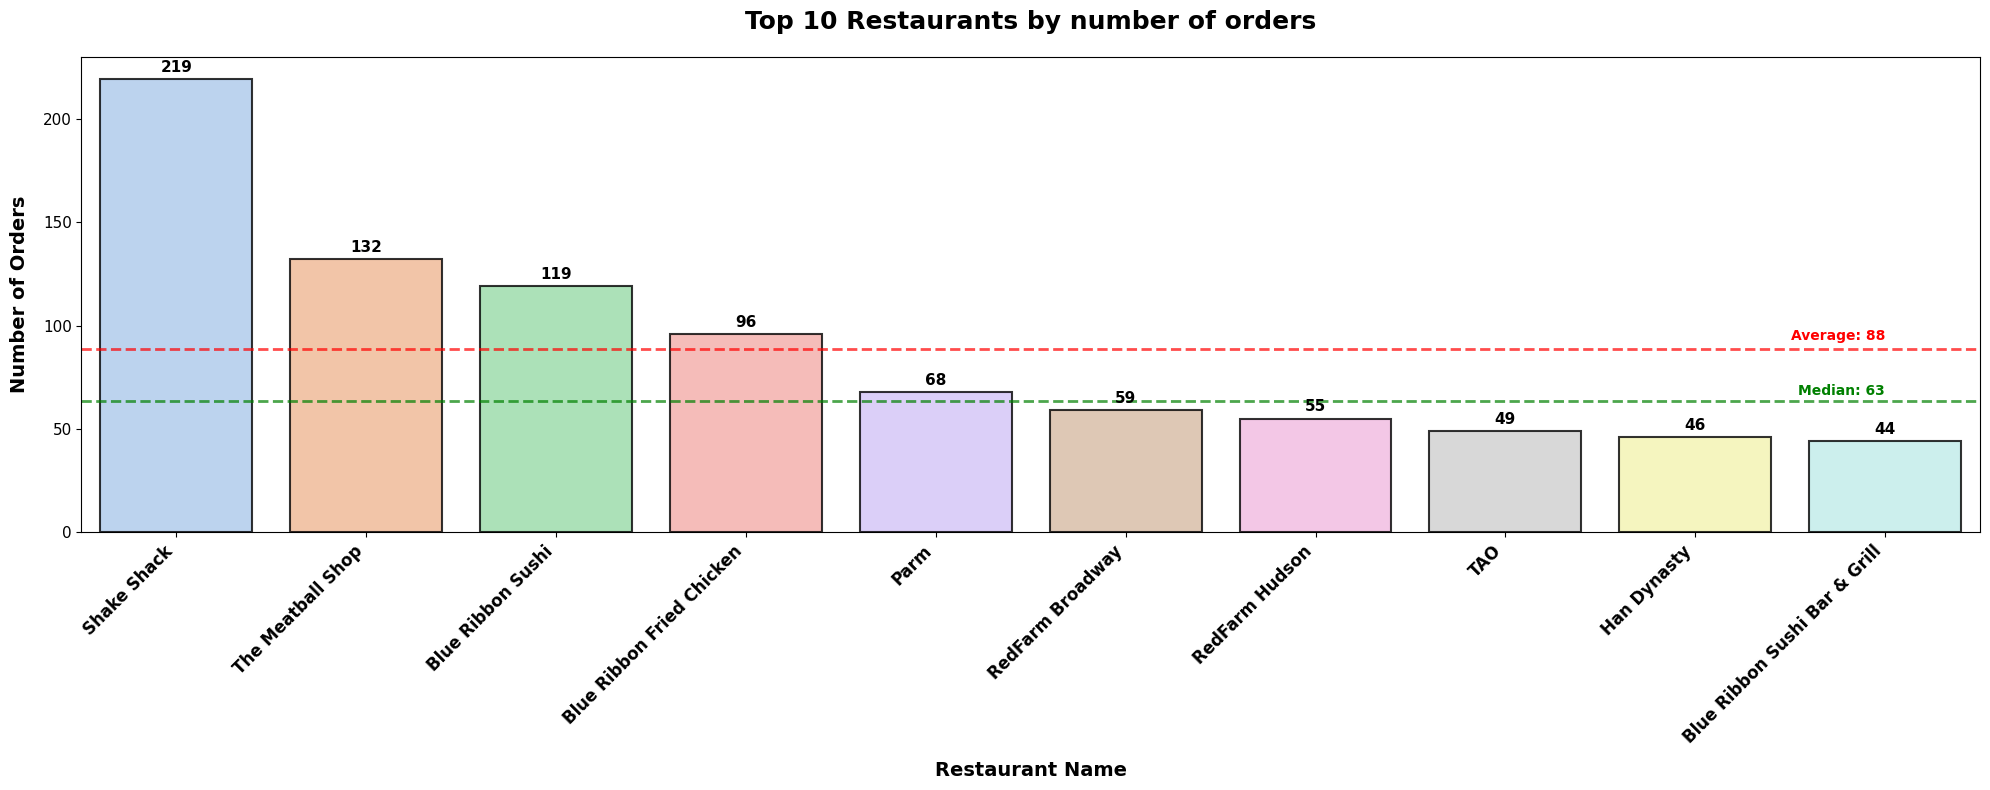

In [17]:
plot_top_values("restaurant_name", "orders", top_restaurants, "Top 10 Restaurants by number of orders", "Restaurant Name", "Number of Orders",2)

In [18]:
print(f"The top 10 restaurants represent {restaurant_orders['percetange_of_orders'].head(10).sum()}% of the orders.")

The top 10 restaurants represent 46.73% of the orders.


In [19]:
one_order_restaurants = restaurant_orders[restaurant_orders["orders"]==1]
one_order_restaurants.reset_index(drop=True, inplace=True)

In [20]:
print(f"There are {one_order_restaurants.shape[0]} restaurants who only have 1 order in the dataset.")

There are 50 restaurants who only have 1 order in the dataset.


In [21]:
one_order_restaurants.head()

,restaurant_name,orders,percetange_of_orders
0,Taro Sushi,1,0.05
1,Socarrat Paella Bar,1,0.05
2,Wa Jeal,1,0.05
3,Wo Hop Restaurant,1,0.05
4,Woorijip,1,0.05


#### Observations:

  There were **178 restaurants** and **1,898 orders** in the dataset.   **Shake Shack** is the restaurant with the most orders (219), which corresponds to **11.54%** of the total orders.
*   The mean of the orders per restaurant is **10.7**. However, taking a closer look at the standard deviation (**24.04**) indicates that the values from the dataset have **high variability** (the standard deviation is more than twice the mean).
    *   *Observation:* Looking at the histogram, we see that there are too many restaurants with few orders, as well as a few restaurants with too many orders (high skew).
*   Using the **median (3 orders)** could be a better measure of central tendency fopical restsaurant.
*   The top 10 restaurants represent **46.73% of the total orders**.
*   10 The top restaurants have an average of **88 orders**. But again, given the nature of the data, using the **median (63 orders)** can be a good alternative.
*   There are **50 restaurants** who only have 1 order in th dataset.

### Cuisines

In [22]:
# Get all the cuisines contain inside the dataframe
cuisines = df.groupby("cuisine_type").count().sort_values(by="order_id", ascending=False)
cuisines = cuisines.iloc[:,:1].reset_index()
cuisines = cuisines.rename(columns={'order_id': 'orders'})

In [23]:
print(f"There is a total of {cuisines.shape[0]} different cuisines in the dataset.")

There is a total of 14 different cuisines in the dataset.


In [24]:
# Add new column
cuisines["percetange_of_orders"] = round((cuisines["orders"]/total_orders)*100,2)
cuisines

,cuisine_type,orders,percetange_of_orders
0,American,584,30.77
1,Japanese,470,24.76
2,Italian,298,15.70
3,Chinese,215,11.33
4,Mexican,77,4.06
5,Indian,73,3.85
6,Middle Eastern,49,2.58
7,Mediterranean,46,2.42
8,Thai,19,1.00
9,French,18,0.95


In [25]:
cuisines.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,14.0,135.571429,187.448748,7.00,17.2500,47.5,180.5000,584.00
percetange_of_orders,14.0,7.142857,9.875966,0.37,0.9125,2.5,9.5125,30.77


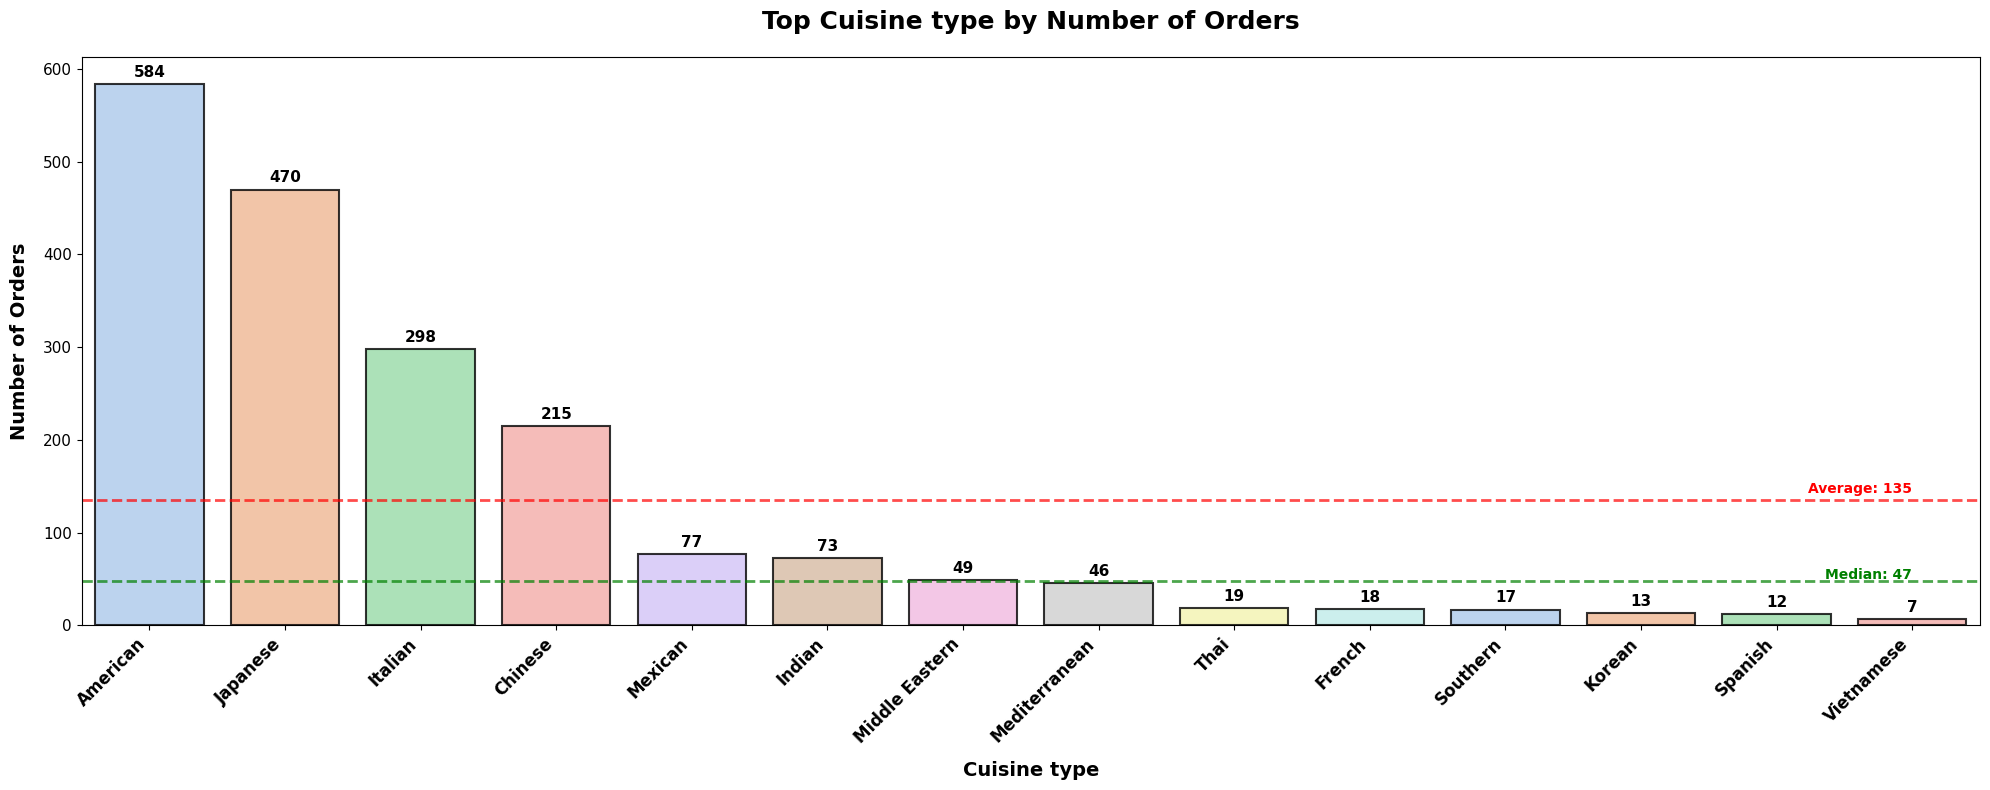

In [26]:
plot_top_values("cuisine_type", "orders", cuisines, "Top Cuisine type by Number of Orders", "Cuisine type", "Number of Orders",2)

In [27]:
cuisines.head(4).sum()

cuisine_type            AmericanJapaneseItalianChinese
orders                                            1567
percetange_of_orders                             82.56
dtype: object

#### Observations:
* There are 14 types of cuisines.
* **American**, **Japanese**, **Italian** and **Chinese** have over 200 orders each. Which combined is equal to **82.56%** of the total orders.

### Time of the orders

In [28]:
# Get day of the week in which the orders were order
orders_distribution = df.groupby("day_of_the_week").count().sort_values(by="order_id", ascending=False)
orders = orders_distribution.iloc[:,:1].reset_index()
orders = orders.rename(columns={'order_id': 'orders'})
orders["percetange_of_orders"] = round((orders["orders"]/total_orders)*100,2)
orders

,day_of_the_week,orders,percetange_of_orders
0,Weekend,1351,71.18
1,Weekday,547,28.82


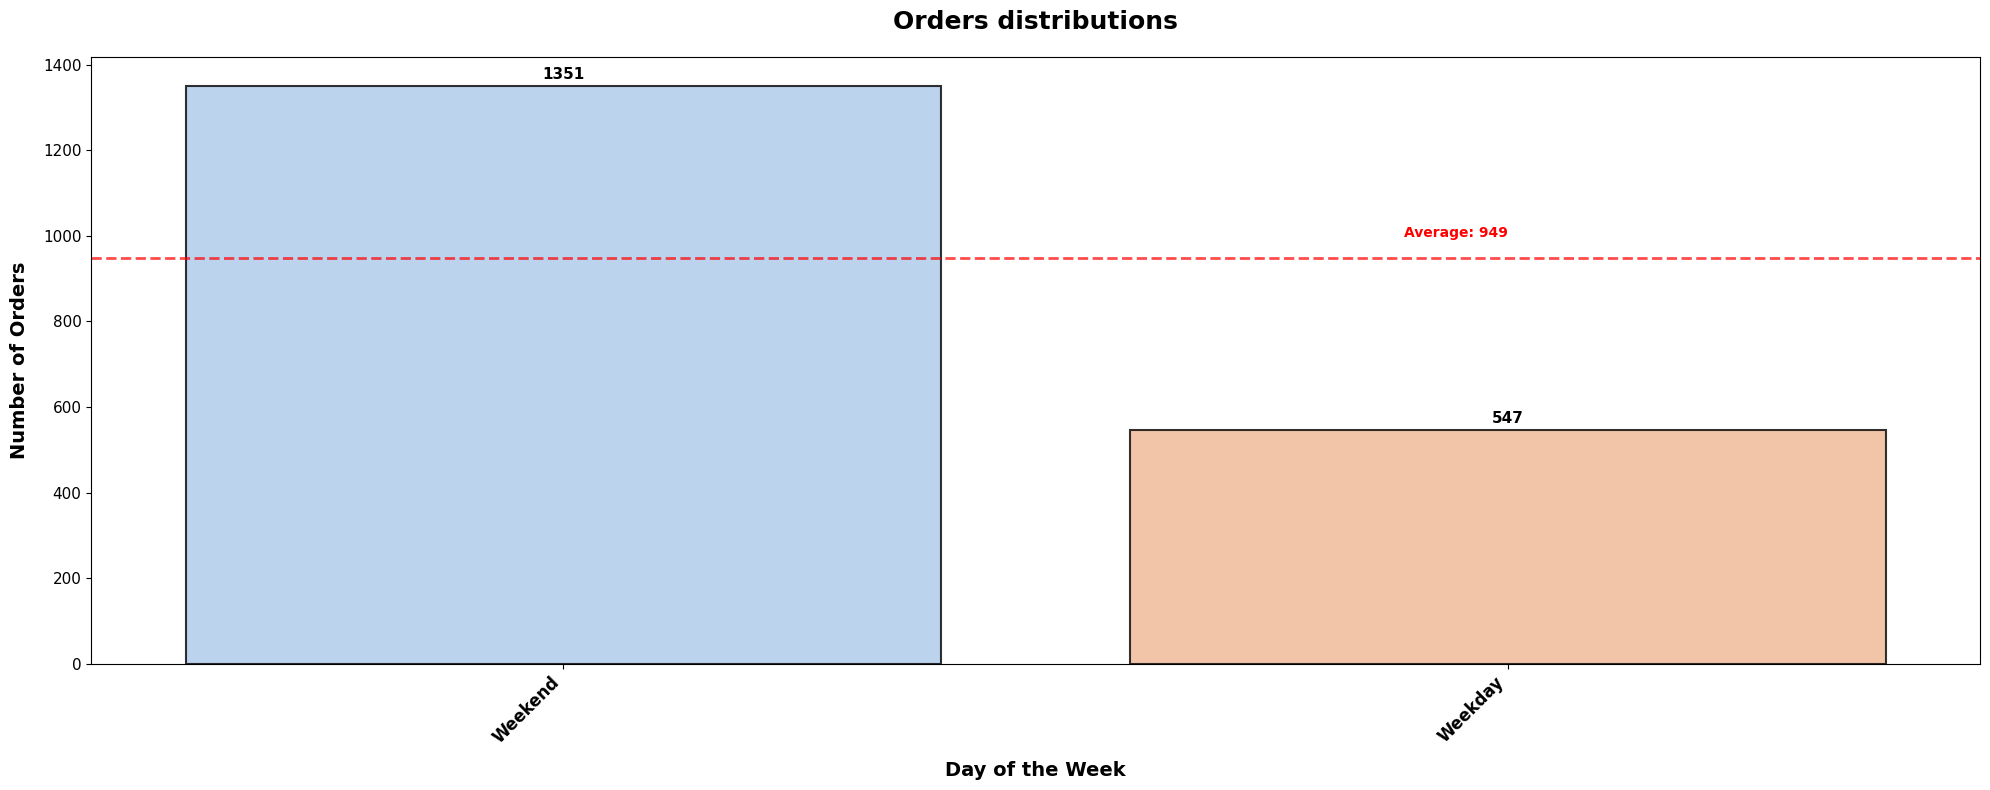

In [29]:
plot_top_values("day_of_the_week", "orders", orders, "Orders distributions", "Day of the Week", "Number of Orders", 1)

In [30]:
# Select all the restaurants that had orders during Weekday
orders_weekday = df[df["day_of_the_week"]=="Weekday"]
orders_weekday = orders_weekday.groupby("restaurant_name").count().sort_values(by="order_id", ascending=False).reset_index()
orders_weekday = orders_weekday.iloc[:,:2]
orders_weekday = orders_weekday.rename(columns={'order_id': 'orders_weekday'})
print(f"There were {orders_weekday.shape[0]} restaurants who had orders during the weekday.")

There were 121 restaurants who had orders during the weekday.


In [31]:
orders_weekday.head()

,restaurant_name,orders_weekday
0,Shake Shack,74
1,The Meatball Shop,37
2,Blue Ribbon Sushi,34
3,Parm,26
4,Blue Ribbon Fried Chicken,22


In [32]:
# Select all the restaurants that had orders during Weekend
orders_weekend = df[df["day_of_the_week"]=="Weekend"]
orders_weekend = orders_weekend.groupby("restaurant_name").count().sort_values(by="order_id", ascending=False).reset_index()
orders_weekend = orders_weekend.iloc[:,:2]
orders_weekend = orders_weekend.rename(columns={'order_id': 'orders_weekend'})
print(f"There were {orders_weekend.shape[0]} restaurants who had orders during the weekend.")

There were 159 restaurants who had orders during the weekend.


In [33]:
orders_weekend.head()

,restaurant_name,orders_weekend
0,Shake Shack,145
1,The Meatball Shop,95
2,Blue Ribbon Sushi,85
3,Blue Ribbon Fried Chicken,74
4,RedFarm Broadway,44


In [34]:
# Merge previous dataframes
orders_week = pd.merge(orders_weekend, orders_weekday, on="restaurant_name", how="inner")
print(f"There were {orders_week.shape[0]} during both the weekday and weekend.")

There were 102 during both the weekday and weekend.


In [35]:
orders_week.head()

,restaurant_name,orders_weekend,orders_weekday
0,Shake Shack,145,74
1,The Meatball Shop,95,37
2,Blue Ribbon Sushi,85,34
3,Blue Ribbon Fried Chicken,74,22
4,RedFarm Broadway,44,15


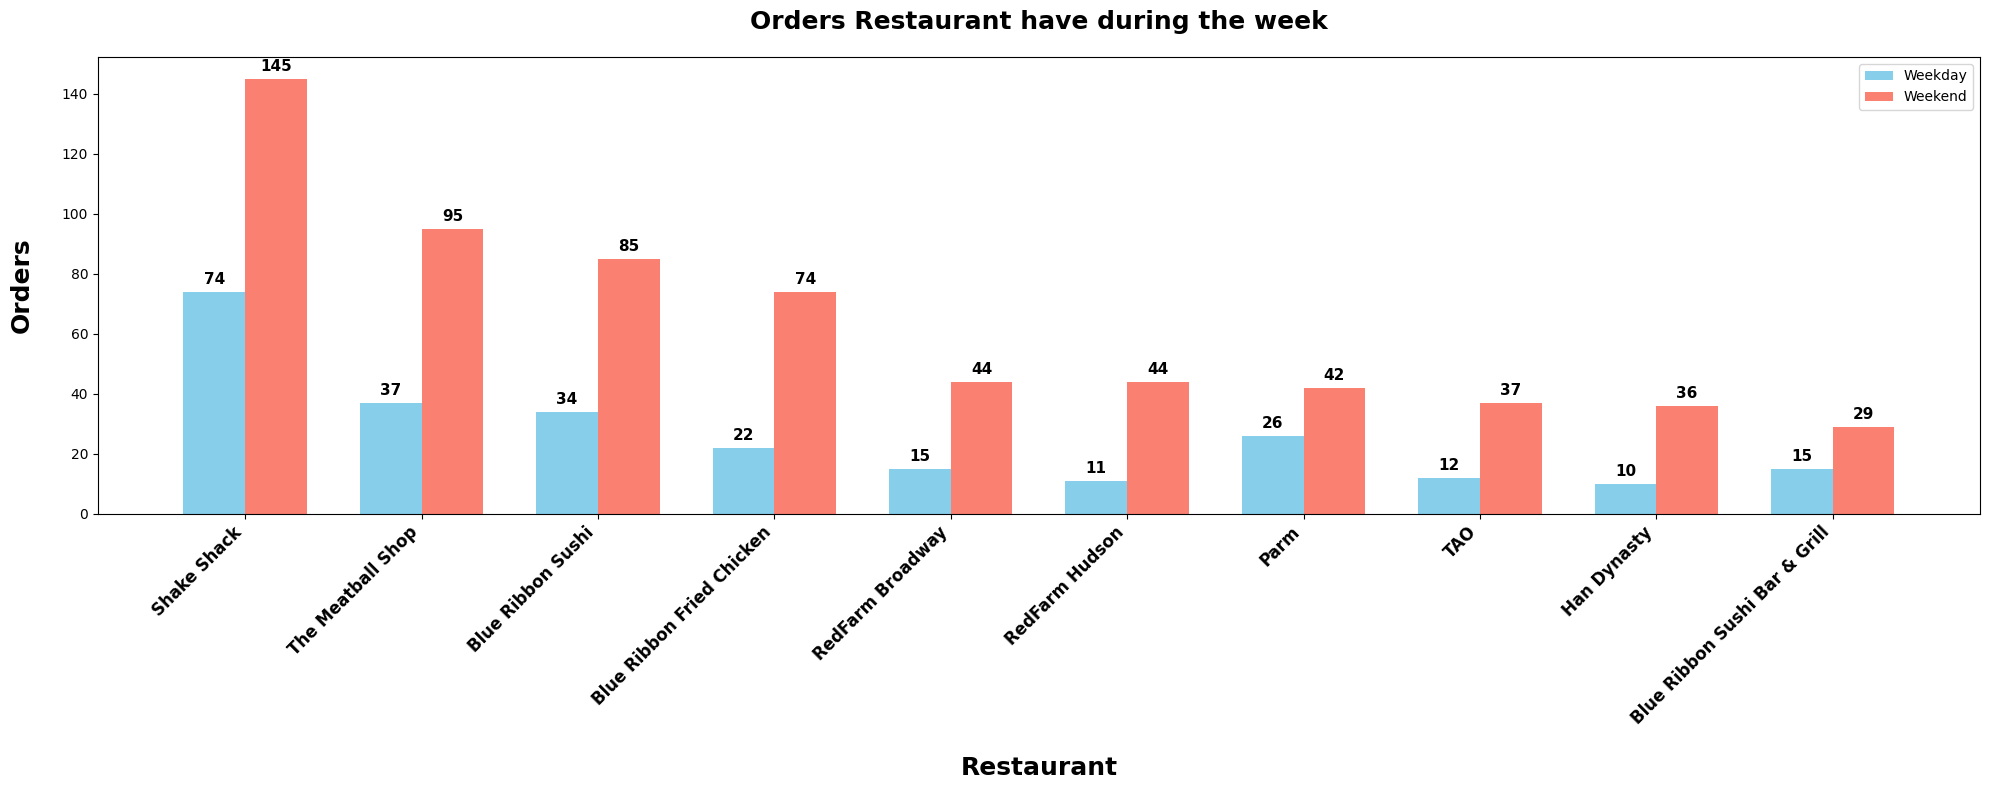

In [36]:
plot_double_chart(orders_week.head(10),"orders_weekday" ,"orders_weekend","Orders Restaurant have during the week", "Restaurant", "Orders")

In [37]:
# Obtain the list of restaurants that had orders during weekday
restaurants_with_orders_weekday=orders_weekday["restaurant_name"].tolist()

In [38]:
# Obtain the list of restaurants that had orders during weekdend
restaurants_with_orders_weekend=orders_weekend["restaurant_name"].tolist()

In [39]:
# Compare both lists to obtain the restaurants missing orders during weekend
restaurants_without_orders_weekend = np.setdiff1d(restaurants_with_orders_weekday, restaurants_with_orders_weekend)
print(f"{len(restaurants_without_orders_weekend)} restaurants do not have orders during the weekend:\n")
print(restaurants_without_orders_weekend)

19 restaurants do not have orders during the weekend:

["'wichcraft" '67 Burger' 'Anjappar Chettinad' 'Balade'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Dig Inn Seasonal Market'
 'Dos Caminos Soho' 'Frank Restaurant' 'Haru Gramercy Park' 'Hunan Manor'
 'Kori Restaurant and Bar' 'Nha Trang One' 'Pepe Giallo' 'Philippe Chow'
 'Pongsri Thai' 'Rye House' "Sarabeth's West" 'Saravanaa Bhavan'
 'Taro Sushi']


In [40]:
# Compare both lists to obtain the restaurants missing orders during weekday
restaurants_without_orders_weekday = np.setdiff1d(restaurants_with_orders_weekend, restaurants_with_orders_weekday)
print(f"{len(restaurants_without_orders_weekday)} restaurants do not have orders during the weekday:\n")
print(restaurants_without_orders_weekday)

57 restaurants do not have orders during the weekday:

['Alidoro' "Big Daddy's" 'Bistango' 'Byblos Restaurant'
 'Cafe de La Esquina' 'Chola Eclectic Indian Cuisine' 'Chote Nawab'
 'Cipriani Le Specialita' "Coppola's East" 'Crema Restaurante'
 'Delicatessen' 'DespaÌ±a' "Dickson's Farmstand Meats"
 'Dirty Bird To Go (archived)' "Don's Bogam BBQ & Wine Bar"
 'DuMont Burger' 'Emporio' 'Friend of a Farmer' 'Gaia Italian Cafe'
 'Galli Restaurant' 'Hampton Chutney Co.' 'Hangawi' 'Hibino'
 "Hiroko's Place" 'Hot Kitchen' 'Hummus Place' 'Il Bambino'
 'Kambi Ramen House' 'Klong' 'La Follia' 'Lamarca Pasta' 'Le Grainne Cafe'
 'Le Zie 2000 Trattoria' 'Lucky Strike' 'Market Table' 'Mira Sushi'
 'Mission Cantina' 'Moonstruck on Second' "Paul & Jimmy's"
 'Piccolo Angolo' 'Pinto Nouveau Thai Bistro' 'Posto' 'Rohm Thai'
 'Samurai Mama' "Sarabeth's East" "Schnipper's Quality Kitchen"
 'Socarrat Paella Bar' 'Song Thai Restaurant & Bar' 'Spice Thai'
 'Sushi Choshi' 'The Loop' 'The MasalaWala' "Tony's Di Na

#### Observations:

* On Weekend there were **1351 orders (71.18% of the orders)**.
* On Weekday there were **547 orders (28.82% of the orders**.
* There were **121 restaurants who had orders during the weekday**.
* There were **159 restaurants who had orders during the weekend**.
* There were **102 restaurants during both the weekday and weekend who had orders**.
* **Shake Shack** has the most orders both during weekend and weekday.
* **19 restaurants** do not have orders during the weekend.
* **57 restaurants** do not have orders during the weekday.

### Earnings

In [41]:
# Get how much the orders earn in revenue
earnings = df["cost_of_the_order"].sum()
print(f"The total earnings were: {earnings}")

The total earnings were: 31314.82


In [42]:
# Obtain the earnings of each restaurant
restaurant_earnings = df[["restaurant_name","cost_of_the_order"]].groupby("restaurant_name").sum().sort_values(by="cost_of_the_order", ascending=False).reset_index()
restaurant_earnings = restaurant_earnings.rename(columns={'cost_of_the_order': 'earnings'})
restaurant_earnings["percetange_of_earnings"] = round((restaurant_earnings["earnings"]/earnings)*100,2)
restaurant_earnings.head(10)

,restaurant_name,earnings,percetange_of_earnings
0,Shake Shack,3579.53,11.43
1,The Meatball Shop,2145.21,6.85
2,Blue Ribbon Sushi,1903.95,6.08
3,Blue Ribbon Fried Chicken,1662.29,5.31
4,Parm,1112.76,3.55
5,RedFarm Broadway,965.13,3.08
6,RedFarm Hudson,921.21,2.94
7,TAO,834.50,2.66
8,Han Dynasty,755.29,2.41
9,Blue Ribbon Sushi Bar & Grill,666.62,2.13


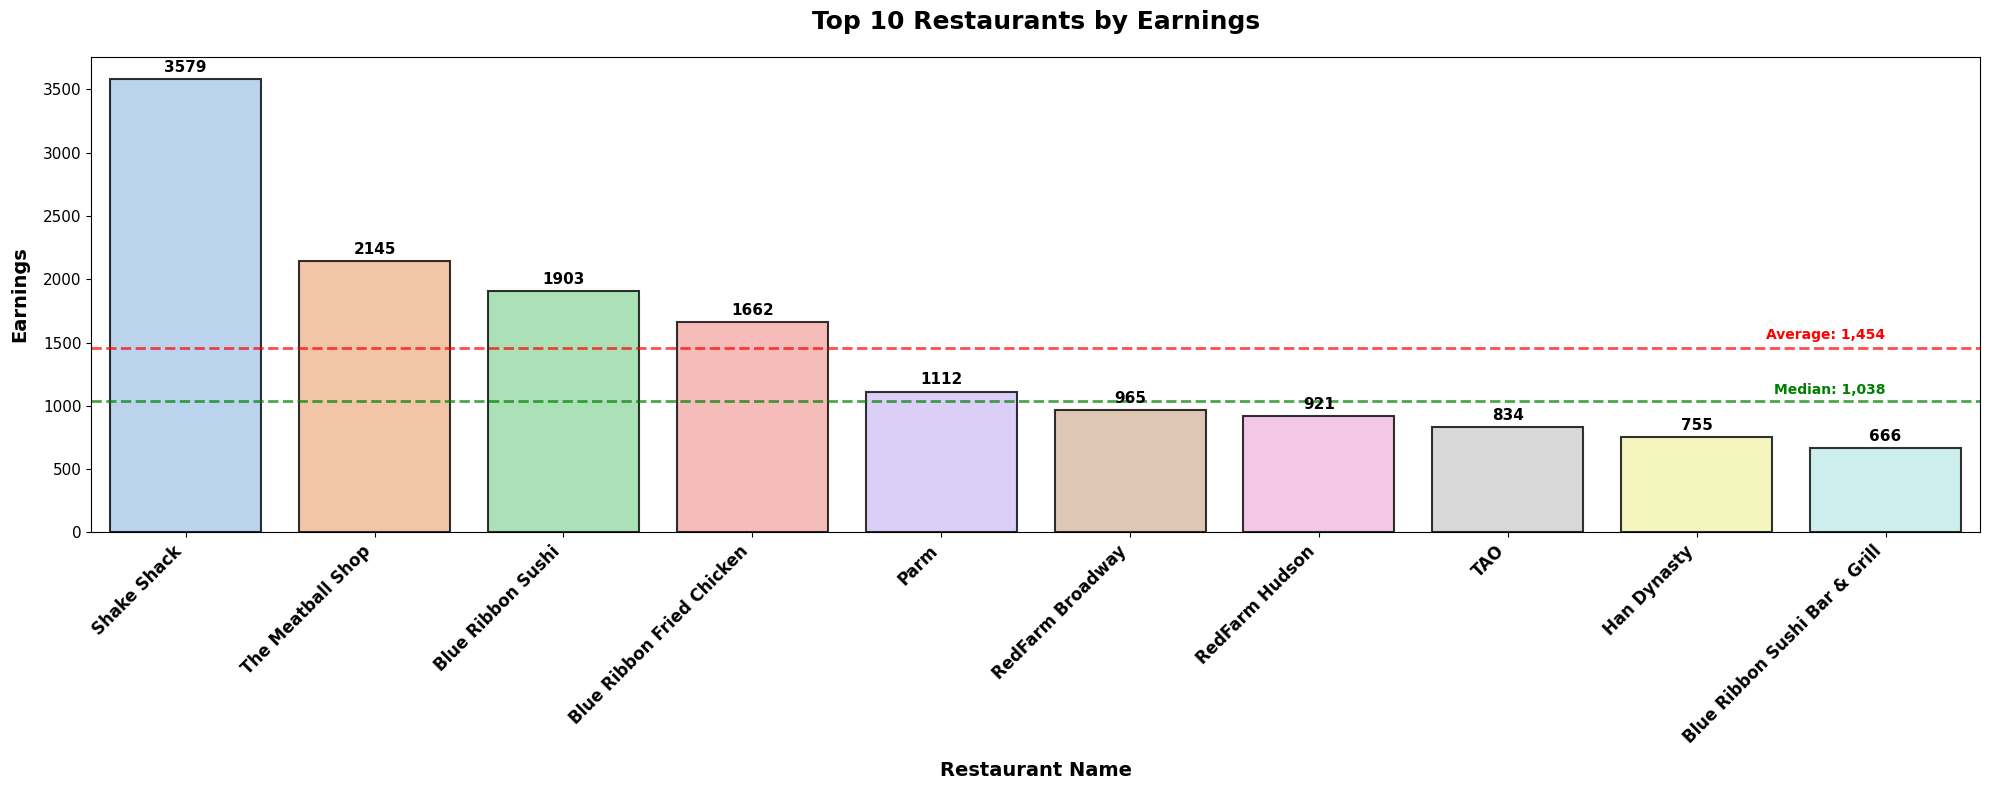

In [43]:
top_earnings = restaurant_earnings.head(10)
plot_top_values("restaurant_name", "earnings", top_earnings, "Top 10 Restaurants by Earnings", "Restaurant Name", "Earnings",2)

In [44]:
print(f"The top 10 restaurants represent {round(top_earnings['earnings'].sum(),2)} of the total earnings.")

The top 10 restaurants represent 14546.49 of the total earnings.


In [45]:
print(f"Which is about {round(top_earnings['percetange_of_earnings'].sum(),2)} % of the total earnings.")

Which is about 46.44 % of the total earnings.


In [46]:
restaurant_earnings.describe().T

,count,mean,std,min,25%,50%,75%,max
earnings,178.0,175.925955,394.615994,5.72,23.84,54.615,124.8425,3579.53
percetange_of_earnings,178.0,0.561742,1.259993,0.02,0.08,0.175,0.4000,11.43


In [47]:
# Get the restaurants who only had 1 order
onetime_order_restaurants = restaurant_orders[restaurant_orders["orders"]==1]
onetime_restaurants = onetime_order_restaurants["restaurant_name"].tolist()

In [85]:
print(f"There are {len(onetime_restaurants)} restaurants who only have 1 order:\n")
print(onetime_restaurants)

There are 50 restaurants who only have 1 order:

['Taro Sushi', 'Socarrat Paella Bar', 'Wa Jeal', 'Wo Hop Restaurant', 'Woorijip', 'Sushi Choshi', 'The MasalaWala', 'Spice Thai', "'wichcraft", "Sarabeth's West", 'Haru Gramercy Park', 'Galli Restaurant', 'Gaia Italian Cafe', 'Frank Restaurant', 'Emporio', 'Dos Caminos Soho', 'Dig Inn Seasonal Market', 'Crema Restaurante', "Coppola's East", 'Cipriani Le Specialita', 'Chote Nawab', 'Chola Eclectic Indian Cuisine', 'Cafe de La Esquina', 'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Balade', 'Anjappar Chettinad', 'Alidoro', '67 Burger', 'Hampton Chutney Co.', 'Hibino', 'Samurai Mama', "Hiroko's Place", 'Rye House', 'Rohm Thai', 'Posto', 'Philippe Chow', 'Pepe Giallo', "Paul & Jimmy's", 'Nha Trang One', 'Moonstruck on Second', 'Market Table', 'Lucky Strike', 'Le Zie 2000 Trattoria', 'La Follia', 'Kori Restaurant and Bar', 'Klong', 'Kambi Ramen House', 'Il Bambino', 'Hunan Manor', 'Lamarca Pasta']


In [49]:
# Show the earnings of these restaurants
earnings_onetime_restaurants = restaurant_earnings[restaurant_earnings["restaurant_name"].isin(onetime_restaurants)].reset_index(drop=True)
earnings_onetime_restaurants.head()

,restaurant_name,earnings,percetange_of_earnings
0,Kambi Ramen House,32.93,0.11
1,Emporio,31.43,0.10
2,Haru Gramercy Park,29.83,0.10
3,Lucky Strike,29.25,0.09
4,Il Bambino,29.25,0.09


In [50]:
print(f"These restaurants represent {round(earnings_onetime_restaurants['earnings'].sum(),2)} of the total earnings.")

These restaurants represent 789.85 of the total earnings.


In [87]:
print(f"Which is about {round(earnings_onetime_restaurants['percetange_of_earnings'].sum(),2)}% of the total earnings.")

Which is about 2.54% of the total earnings.


#### Observations:
* **The total earnings were: 31314.82**
* The **top 10 restaurants represent 14546.49 of the total earnings. About 46.44 % of the total earnings**
* **50 restaurants only have 1 order.** **About 28% of the total restaurants available on foodhub**
* These restaurants represent **789.85 of earnings. Which is about 2.54% of the total earnings.**

### Food preparation time & delivery Time

In [52]:
# Get the preparation time and delivery time for the restaurants during weekday
food_time_weekday = df[df["day_of_the_week"]=="Weekday"]
food_time_weekday = food_time_weekday.groupby("restaurant_name").mean().reset_index()
food_time_weekday = food_time_weekday.iloc[:,[0,4,5]]
# Combine weekday food_time dataframe with orders_weekday
food_time_weekday = pd.merge(food_time_weekday, orders_weekday, on="restaurant_name", how="inner").sort_values(by="orders_weekday", ascending=False).reset_index(drop=True)
food_time_weekday = food_time_weekday.rename(columns={"food_preparation_time": "food_preparation_time_weekday", "delivery_time": "delivery_time_weekday"})
food_time_weekday.head()

,restaurant_name,food_preparation_time_weekday,delivery_time_weekday,orders_weekday
0,Shake Shack,28.054054,28.581081,74
1,The Meatball Shop,26.891892,28.594595,37
2,Blue Ribbon Sushi,27.676471,28.176471,34
3,Parm,27.538462,28.807692,26
4,Blue Ribbon Fried Chicken,27.090909,28.181818,22


In [53]:
food_time_weekday.describe().T

,count,mean,std,min,25%,50%,75%,max
food_preparation_time_weekday,121.0,26.661468,3.686855,20.0,24.0,26.636364,29.0,35.0
delivery_time_weekday,121.0,28.382785,2.363914,24.0,27.0,28.333333,30.0,33.0
orders_weekday,121.0,4.520661,8.644940,1.0,1.0,2.000000,4.0,74.0


In [54]:
# Get the preparation time and delivery time for the restaurants during weekend
food_time_weekend = df[df["day_of_the_week"]=="Weekend"]
food_time_weekend = food_time_weekend.groupby("restaurant_name").mean().reset_index()
food_time_weekend = food_time_weekend.iloc[:,[0,4,5]]
# Combine weekend food_time dataframe with orders_weekend
food_time_weekend = pd.merge(food_time_weekend, orders_weekend, on="restaurant_name", how="inner").sort_values(by="orders_weekend", ascending=False).reset_index(drop=True)
food_time_weekend = food_time_weekend.rename(columns={"food_preparation_time": "food_preparation_time_weekend", "delivery_time": "delivery_time_weekend"})
food_time_weekend.head()

,restaurant_name,food_preparation_time_weekend,delivery_time_weekend,orders_weekend
0,Shake Shack,27.889655,22.662069,145
1,The Meatball Shop,27.294737,22.547368,95
2,Blue Ribbon Sushi,28.023529,22.247059,85
3,Blue Ribbon Fried Chicken,27.229730,22.945946,74
4,RedFarm Broadway,27.068182,21.000000,44


In [55]:
food_time_weekend.describe().T

,count,mean,std,min,25%,50%,75%,max
food_preparation_time_weekend,159.0,27.387261,3.262227,20.0,25.519231,27.473684,29.000,35.0
delivery_time_weekend,159.0,22.434021,3.504934,15.0,20.472222,22.500000,24.125,30.0
orders_weekend,159.0,8.496855,17.599940,1.0,1.000000,2.000000,8.000,145.0


In [56]:
restaurant_times = pd.merge(food_time_weekend, food_time_weekday, on="restaurant_name", how="inner")
restaurant_times = restaurant_times.reindex(columns=["restaurant_name",'food_preparation_time_weekday', 'food_preparation_time_weekend', 'delivery_time_weekday', 'delivery_time_weekend', "orders_weekday", "orders_weekend"])
restaurant_times.head()

,restaurant_name,food_preparation_time_weekday,food_preparation_time_weekend,delivery_time_weekday,delivery_time_weekend,orders_weekday,orders_weekend
0,Shake Shack,28.054054,27.889655,28.581081,22.662069,74,145
1,The Meatball Shop,26.891892,27.294737,28.594595,22.547368,37,95
2,Blue Ribbon Sushi,27.676471,28.023529,28.176471,22.247059,34,85
3,Blue Ribbon Fried Chicken,27.090909,27.229730,28.181818,22.945946,22,74
4,RedFarm Broadway,29.133333,27.068182,29.466667,21.000000,15,44


In [142]:
restaurant_times.describe().T

,count,mean,std,min,25%,50%,75%,max
food_preparation_time_weekday,102.0,26.753310,3.486846,20.0,24.750000,26.693182,28.833333,35.0
food_preparation_time_weekend,102.0,27.117327,2.404061,20.0,25.761364,27.297727,28.250000,33.0
delivery_time_weekday,102.0,28.478597,2.246420,24.0,27.297619,28.374126,30.000000,33.0
delivery_time_weekend,102.0,22.334523,2.860226,15.0,21.000000,22.450000,23.600000,30.0
orders_weekday,102.0,5.127451,9.288203,1.0,1.000000,2.000000,4.750000,74.0
orders_weekend,102.0,12.186275,21.099824,1.0,2.000000,5.000000,12.000000,145.0


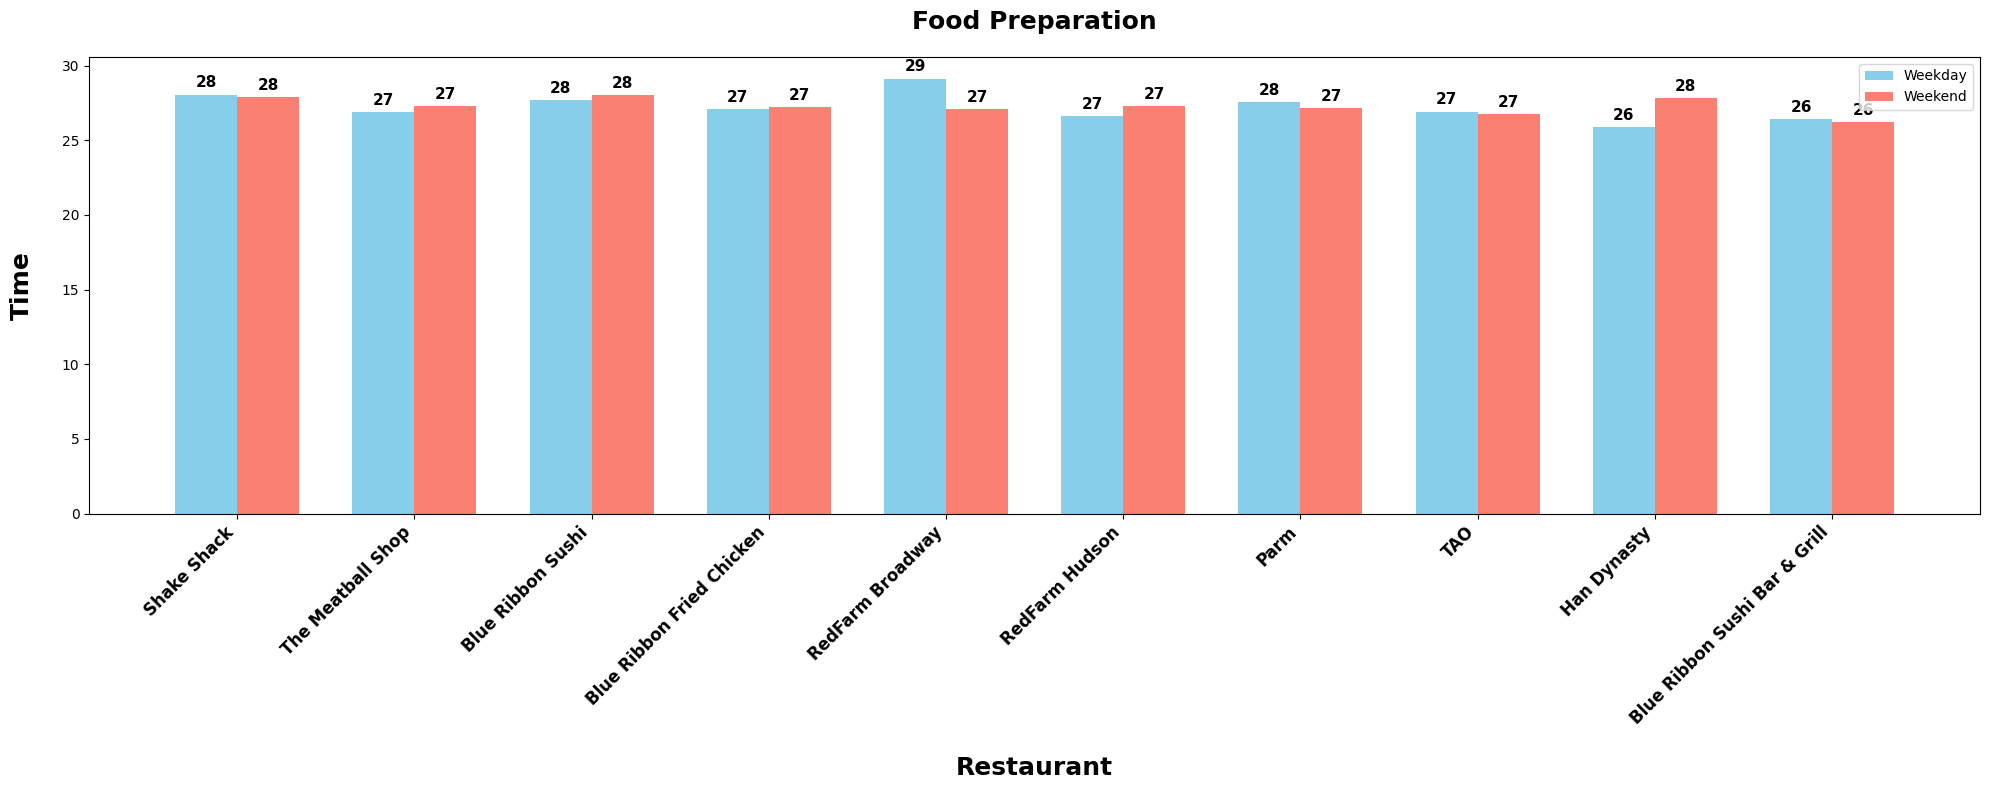

In [57]:
plot_double_chart(restaurant_times.head(10), "food_preparation_time_weekday", "food_preparation_time_weekend", "Food Preparation", "Restaurant", "Time")

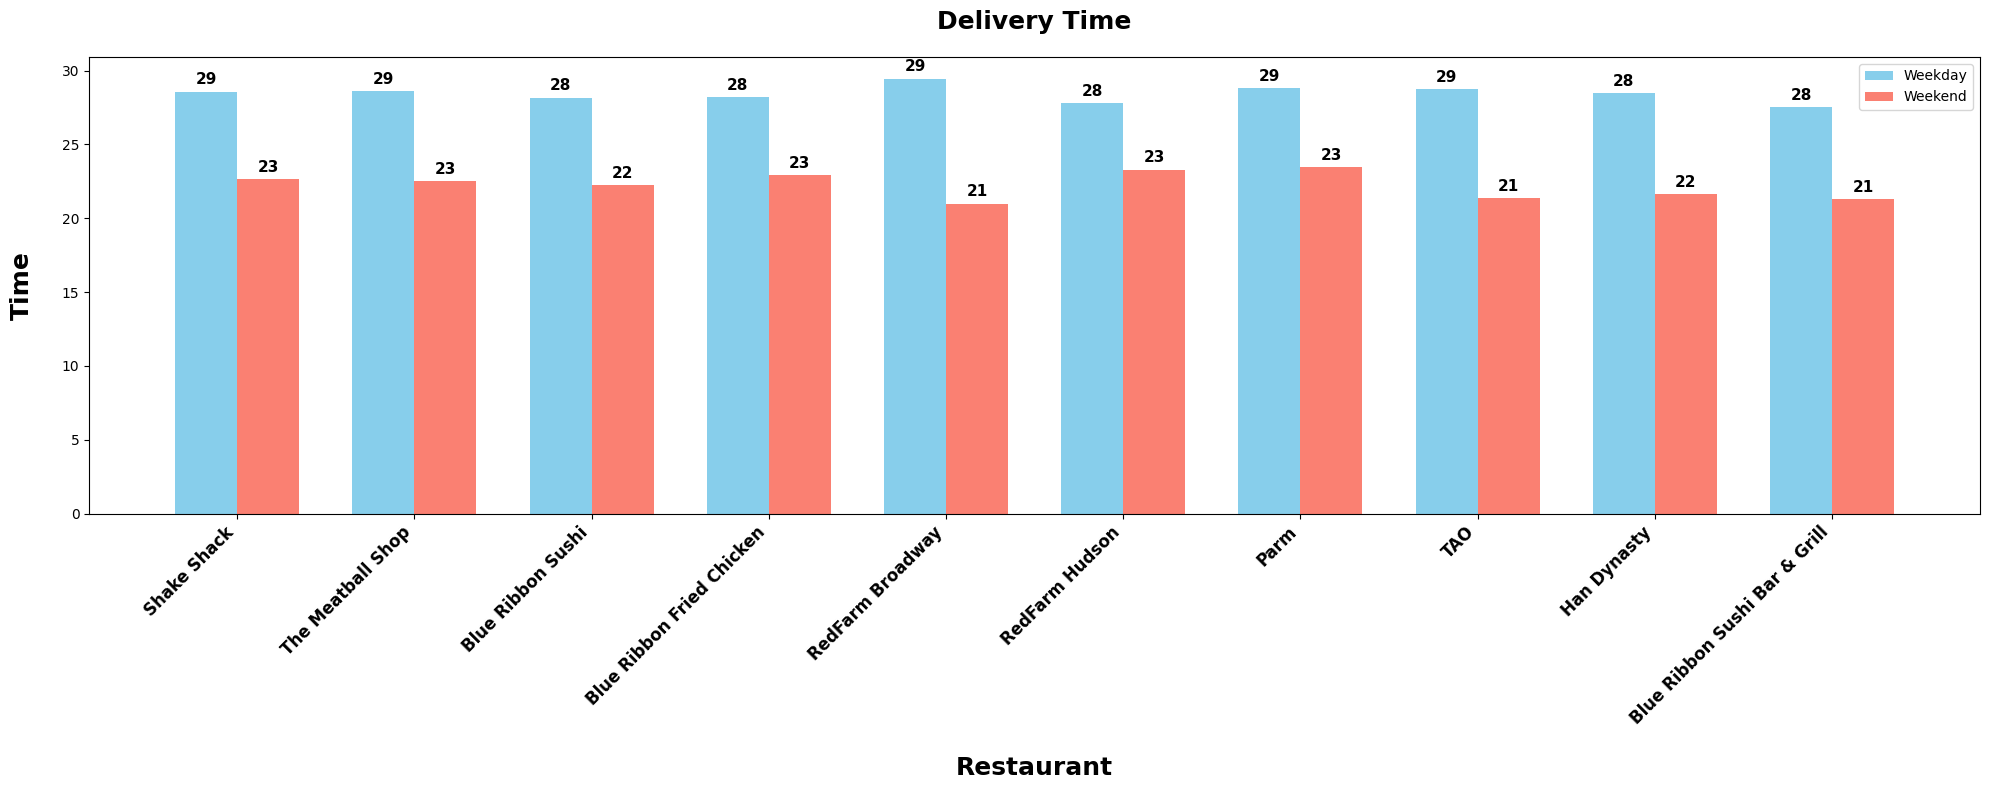

In [58]:
plot_double_chart(restaurant_times.head(10), "delivery_time_weekday", "delivery_time_weekend", "Delivery Time", "Restaurant", "Time")

#### Observations:
* Both delivery_time and preparation_time are between a range of 20-30 minutes*  During weekend and weekday both times are very close despite having much more orders during weekend.

### Customers

In [111]:
# Get how many orders each customer has done
customer_orders = df.groupby("customer_id").count().sort_values(by="order_id", ascending=False)
customer_orders = customer_orders.iloc[:,:1].reset_index()
customer_orders = customer_orders.rename(columns={"order_id":"orders"})
customer_orders.head()

,customer_id,orders
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


In [60]:
print(f"There are {customer_orders.shape[0]} customers")

There are 1200 customers


In [61]:
customer_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1200.0,177202.828333,117661.960754,1311.0,77543.0,133212.0,294304.0,405334.0
orders,1200.0,1.581667,1.090560,1.0,1.0,1.0,2.0,13.0


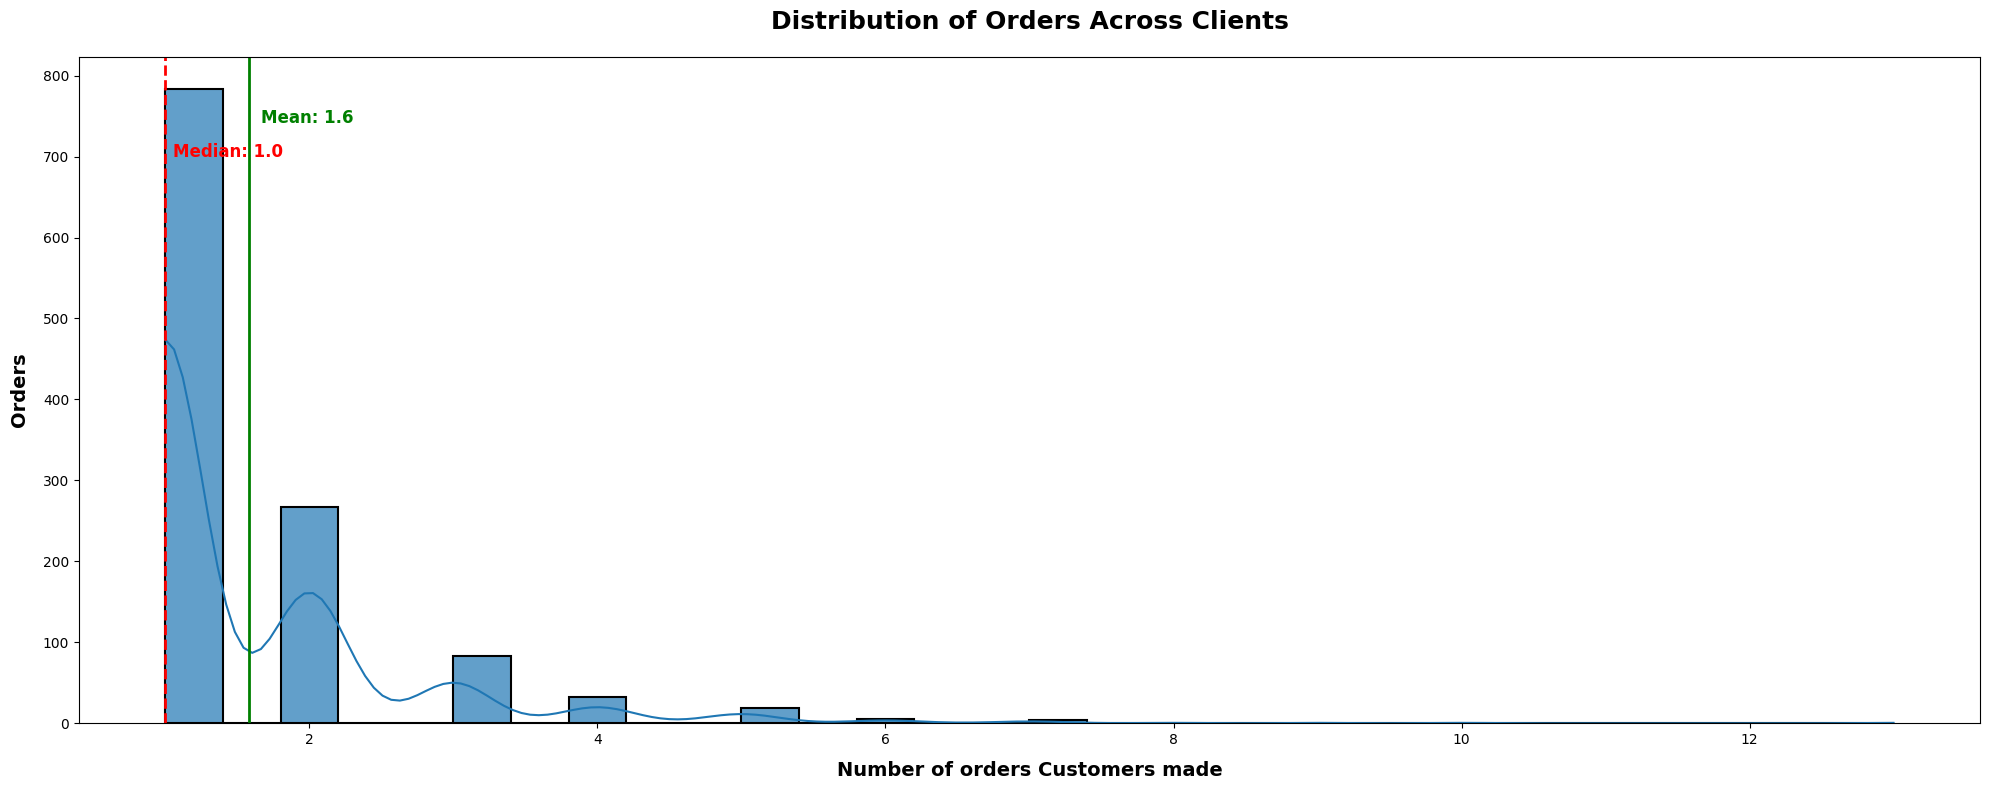

In [62]:
plt.figure(figsize=(20, 8))

ax = sns.histplot(
    data=customer_orders, 
    x="orders",
    bins=30,  
    kde=True,   
    edgecolor="black",
    linewidth=1.5,
    alpha=0.7
)

median_val = customer_orders["orders"].median()
mean_val = customer_orders["orders"].mean()
plt.axvline(x=median_val, color="red", linestyle="--", linewidth=2, label=f"Median: {median_val:.1f}")
plt.axvline(x=mean_val, color="green", linestyle="-", linewidth=2, label=f"Mean: {mean_val:.1f}")

plt.text(mean_val*1.05, ax.get_ylim()[1]*0.9, f"Mean: {mean_val:.1f}", 
         fontsize=12, color="green", fontweight="bold")
plt.text(median_val*1.05, ax.get_ylim()[1]*0.85, f"Median: {median_val:.1f}", 
         fontsize=12, color="red", fontweight="bold")

plt.title("Distribution of Orders Across Clients", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Number of orders Customers made", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Orders", fontsize=14, fontweight="bold", labelpad=10)

plt.tight_layout()

plt.show()

In [103]:
top_customers = customer_orders[customer_orders["orders"]>5]
top_customers.head()

,customer_id,orders
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


In [104]:
print("Clients:")
print(top_customers.shape[0])

Clients:
14


In [105]:
# Get the list of the top customers
top_customer_list = top_customers["customer_id"].tolist() 

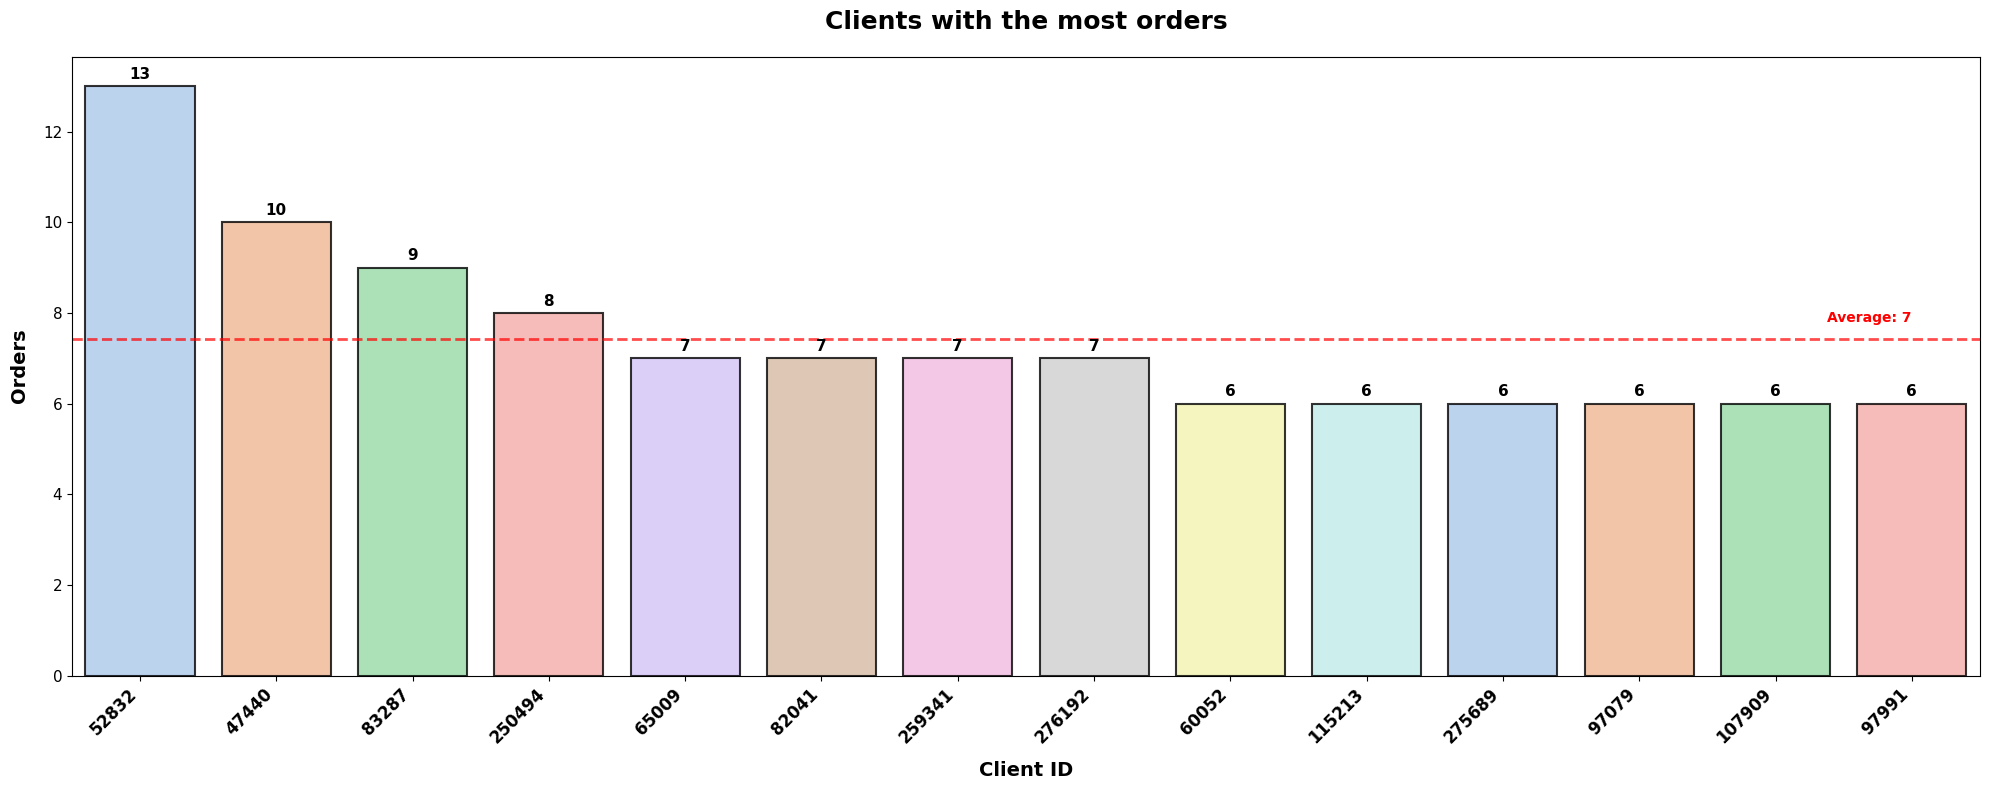

In [106]:
plot_top_values("customer_id", "orders", top_customers, "Clients with the most orders", "Client ID", "Orders", 1)

In [107]:
major_customers_orders = df[df["customer_id"].isin(top_customer_list)]

In [108]:
earnings_major_customer = major_customers_orders.groupby("customer_id").sum().sort_values(by="cost_of_the_order", ascending=False).reset_index()
earnings_major_customer = earnings_major_customer.iloc[:, [0,2]]
earnings_major_customer.head()

,customer_id,cost_of_the_order
0,52832,225.80
1,250494,183.83
2,47440,158.18
3,276192,146.46
4,83287,139.31


In [109]:
print("Earnings from top customers are:")
earnings_major_customer["cost_of_the_order"].sum()

Earnings from top customers are:


1847.48

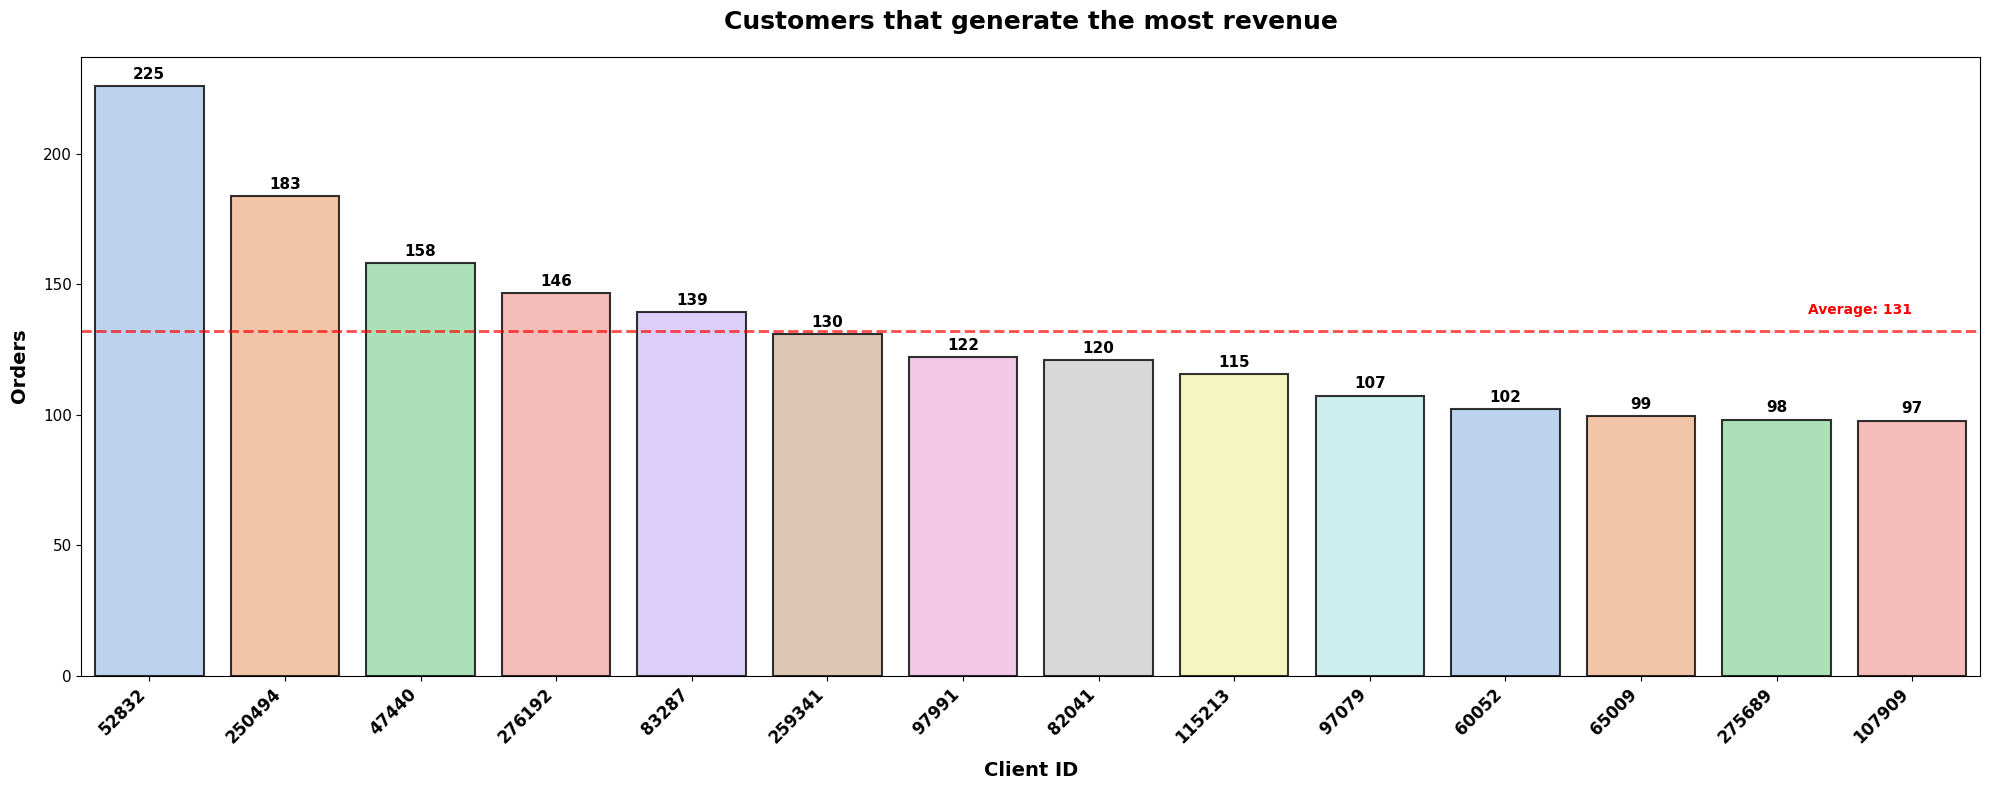

In [68]:
plot_top_values("customer_id", "cost_of_the_order", earnings_major_customer, "Customers that generate the most revenue", "Client ID", "Orders", 1)

In [118]:
print(f"The earning on average per client is: {round(df['cost_of_the_order'].mean(),2)}")

The earning on average per client is: 16.5


In [126]:
# Obtain the restaurants that customers have ordered from
customer_restaurants = df.groupby(["customer_id", "restaurant_name"]).count().sort_values(by="order_id", ascending=False)
customer_restaurants = customer_restaurants.iloc[:,:1].reset_index()
customer_restaurants = customer_restaurants.rename(columns={"order_id":"orders"})
customer_restaurants.head(20)

,customer_id,restaurant_name,orders
0,97991,Blue Ribbon Sushi Bar & Grill,6
1,47440,Bareburger,6
2,97806,Shake Shack,5
3,84087,The Meatball Shop,5
4,270525,The Smile,4
5,276192,Sushi of Gari Tribeca,4
6,331143,Waverly Diner,4
7,87006,Nobu Next Door,4
8,318451,Blue Ribbon Sushi,4
9,177078,Lantern Thai Kitchen,4


In [70]:
# Get the number of restaurants each restaurant has
customer_per_restaurant = customer_restaurants.groupby("restaurant_name").count().sort_values(by="orders", ascending=False).reset_index()
customer_per_restaurant = customer_per_restaurant.iloc[:,:2]
customer_per_restaurant = customer_per_restaurant.rename(columns={"customer_id":"customers"})
customer_per_restaurant.head()

,restaurant_name,customers
0,Shake Shack,170
1,The Meatball Shop,102
2,Blue Ribbon Sushi,75
3,Blue Ribbon Fried Chicken,68
4,Parm,56


In [130]:
top_customer_per_restaurant = customer_per_restaurant.head(20)

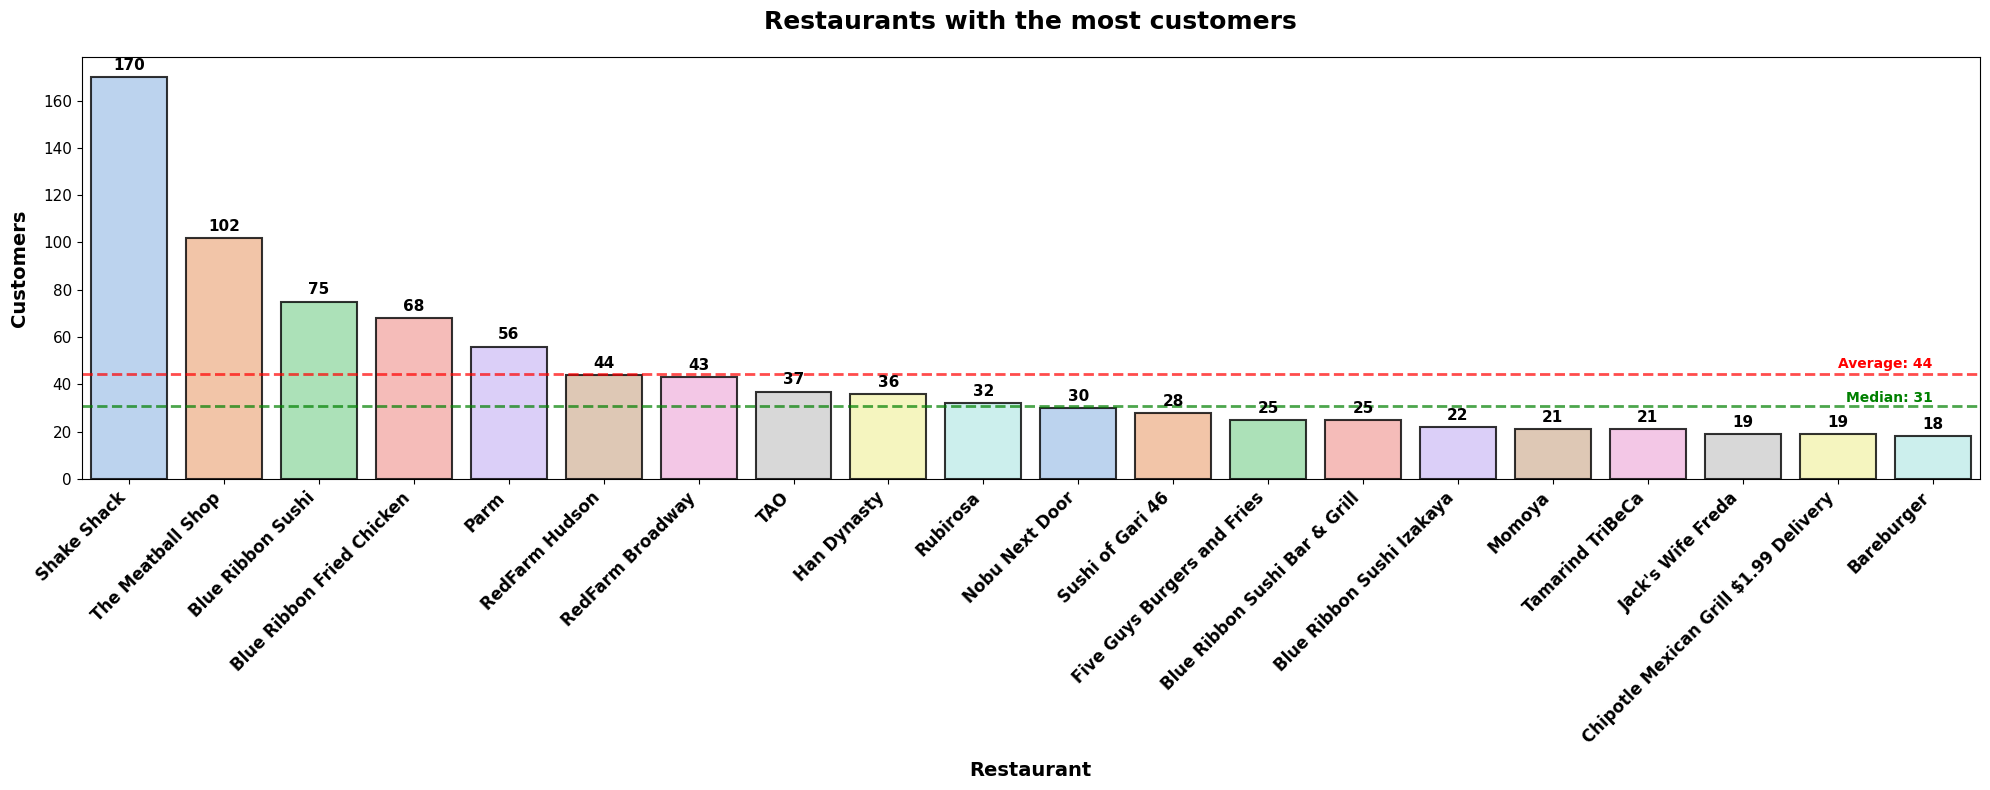

In [133]:
plot_top_values("restaurant_name", "customers", top_customer_per_restaurant, "Restaurants with the most customers", "Restaurant", "Customers", 2)

In [127]:
customer_per_restaurant.describe().T

,count,mean,std,min,25%,50%,75%,max
customers,178.0,8.061798,18.046757,1.0,1.0,2.5,6.0,170.0


In [134]:
customer_per_restaurant.median()

customers    2.5
dtype: float64

In [71]:
# Get the number of customer who order again
returning_customers=customer_restaurants[customer_restaurants["orders"]>1]
returning_customers =returning_customers.groupby("restaurant_name").count().sort_values(by="orders", ascending=False).reset_index()
returning_customers = returning_customers.iloc[:, :2]
returning_customers = returning_customers.rename(columns={"customer_id":"customer_who_cameback"})
returning_customers.head()

,restaurant_name,customer_who_cameback
0,Shake Shack,37
1,Blue Ribbon Sushi,31
2,The Meatball Shop,24
3,Blue Ribbon Fried Chicken,20
4,RedFarm Broadway,13


In [138]:
print(f"Only {returning_customers.shape[0]}  restaurants have customers who cameback to order again.")

Only 91  restaurants have customers who cameback to order again.


In [72]:
# Get the retention of customers each restaurant has
restaurants_customers = pd.merge(customer_per_restaurant, returning_customers, on="restaurant_name", how="left").sort_values(by="customers", ascending=False)
restaurants_customers = restaurants_customers.fillna(0)
restaurants_customers["percentage_of_retention"] = round((restaurants_customers["customer_who_cameback"]/restaurants_customers["customers"])*100,2)
restaurants_customers.head()

,restaurant_name,customers,customer_who_cameback,percentage_of_retention
0,Shake Shack,170,37.0,21.76
1,The Meatball Shop,102,24.0,23.53
2,Blue Ribbon Sushi,75,31.0,41.33
3,Blue Ribbon Fried Chicken,68,20.0,29.41
4,Parm,56,12.0,21.43


In [73]:
# Get the list of customers who only have order once
onetime_customers = customer_orders[customer_orders["orders"]==1]
onetime_customers_list = onetime_customers["customer_id"].tolist()

In [74]:
print(f"{len(onetime_customers)} customers have only ordered once.")

784 customers have only ordered once.


In [75]:
# Show how much revenue this customers generate
earnings_onetime_customers = df[df["customer_id"].isin(onetime_customers_list)]
earnings_onetime_customers = earnings_onetime_customers.iloc[:,[1,4]]
earnings_onetime_customers["cost_of_the_order"].sum()

12949.259999999998

#### Observations
* There are **1200 customers** in the dataset
* **On average customers order 1 time** (mean=1.6, median=1)
* The earning on average per client is: 16.5
* On average restaurants have 8 customers. However given the skewness on the data the the median works better (2 customer).
* 91 restaurants have customers that order again
* **784 customers have only ordered once.** Which is about 65% of the total customers.
* **Clients that only order 1 time generate 12949.25 in revenue. This is a little over 40% of the total earnings.**

### Order Rating

In [77]:
# Count the number of ratings from the orders
ratings = df.groupby("rating").count().sort_values(by="order_id", ascending=False)
ratings = ratings.iloc[:,:1].reset_index()
ratings = ratings.rename(columns={"order_id": "number_of_ratings"})
ratings

,rating,number_of_ratings
0,Not given,736
1,5,588
2,4,386
3,3,188


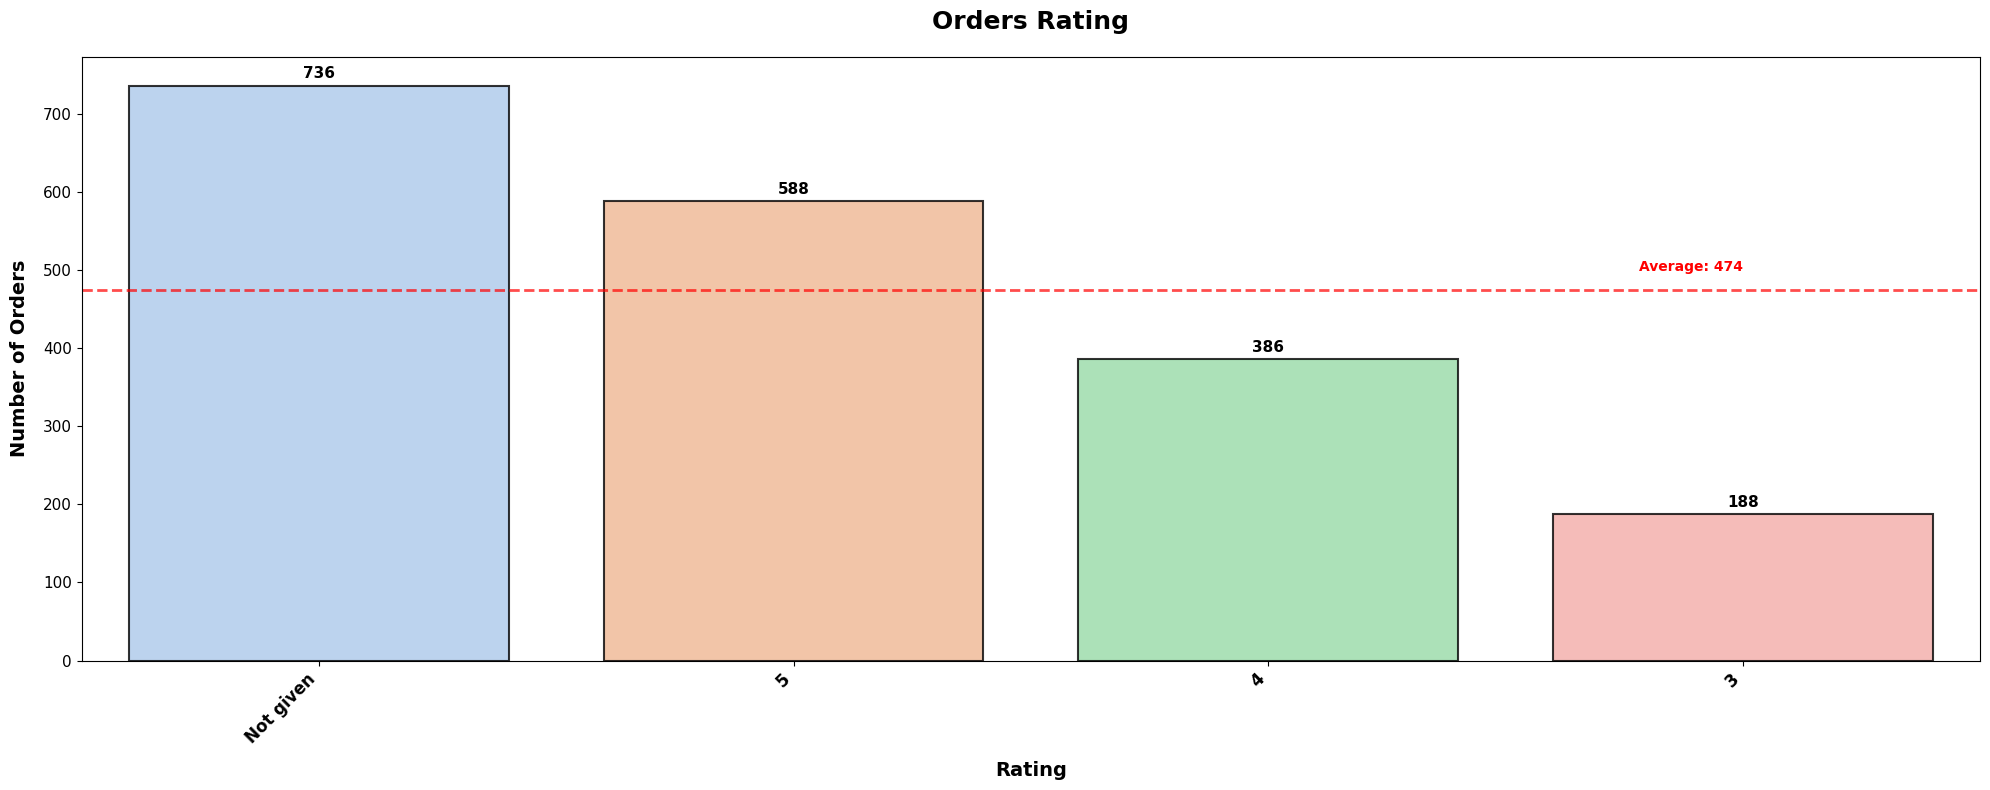

In [78]:
plot_top_values("rating", "number_of_ratings", ratings, "Orders Rating", "Rating", "Number of Orders",1)

In [79]:
# Get only the valid ratings
restaurant_ratings = df[df["rating"].isin(["3","4", "5"])]
restaurant_ratings['rating'] = restaurant_ratings['rating'].astype(int)
valid_ratings= round((restaurant_ratings.shape[0]/total_orders)*100,2)
print(f"Only {restaurant_ratings.shape[0]} orders have a valid rating. Which is about {valid_ratings}%.")

Only 1162 orders have a valid rating. Which is about 61.22%.


In [80]:
# Get the restaurants that had valid ratings
average_restaurant_ratings = restaurant_ratings.groupby("restaurant_name")["rating"].mean().to_frame().reset_index()
average_restaurant_ratings = average_restaurant_ratings.rename(columns={"rating": "average_rating"})
average_restaurant_ratings["average_rating"] = round(average_restaurant_ratings["average_rating"],2)
print(f"{average_restaurant_ratings.shape[0]} restaurants have a valid rating.")

156 restaurants have a valid rating.


In [81]:
average_restaurant_ratings.head()

,restaurant_name,average_rating
0,'wichcraft,5.0
1,12 Chairs,4.5
2,5 Napkin Burger,4.0
3,67 Burger,5.0
4,Amma,4.5


In [141]:
average_restaurant_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,156.0,4.397949,0.552206,3.0,4.0,4.425,5.0,5.0


In [82]:
# Get how many ratings each restaurant has
number_of_restaurant_ratings = restaurant_ratings.groupby("restaurant_name")["rating"].count().to_frame().reset_index()
number_of_restaurant_ratings = number_of_restaurant_ratings.rename(columns={"rating": "number_of_ratings"})
number_of_restaurant_ratings.head()

,restaurant_name,number_of_ratings
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Amma,2


In [83]:
# Combine the previous dataframes
restaurant_ratings =  pd.merge(average_restaurant_ratings, number_of_restaurant_ratings, on="restaurant_name", how="inner").sort_values(by="number_of_ratings", ascending=False).reset_index(drop=True)
restaurant_ratings.head()

,restaurant_name,average_rating,number_of_ratings
0,Shake Shack,4.28,133
1,The Meatball Shop,4.51,84
2,Blue Ribbon Sushi,4.22,73
3,Blue Ribbon Fried Chicken,4.33,64
4,RedFarm Broadway,4.24,41


#### Observations

* Only 1162 orders have a valid rating. Which is about 61.22%.
* 156 restaurants have a valid rating.
* On average restaurants have a rating of 4.3.

### Final Observations

**Restaurant & Order Distribution**

* The dataset includes 178 restaurants and 1,898 orders.
* Shake Shack is the top-performing restaurant, with 219 orders (11.54% of total).
* Order distribution is highly uneven; many restaurants receive very few orders, while a small group concentrates nearly half of the activity.
* The top 10 restaurants account for 46.73% of all orders.

**Temporal Patterns**

* Weekends have substantially higher order volume—almost three times the number of weekday orders.

* Shake Shack leads in both weekend and weekday order counts.

**Revenue Insights**

* Total revenue amounts to 31,314.82.

* The top 10 restaurants contribute 46.44% of total earnings.

* Despite higher order volume on weekends, food preparation time remains consistent between 26 and 27 minutes.

**Customer Behavior**

* The dataset contains 1,200 customers.

* 65% (784 customers) have only placed a single order.

* These one-time customers contribute 12,949.25, representing just over 40% of total revenue.

**Opportunities for Improvement** 
* About 89% of restaurants show potential for increased revenue through targeted strategies.
* Customer retention is a critical area of focus, as many users stop after their first order. This could also indicate that they are new customers just starting to using the app or they stopped using it after one time.
* Customer-level data and restaurant ratings stored in dataframes provide actionable insights to share with FoodHub’s partner restaurants to improve both ratings and order volume.